# Практика по работе с scipy.stats
В этом ноутбуке мы:
* поработаем с разными распределениями, реализованными в `scipy.stats`;
* научимся генерировать выборки из генератора распределения;
* научимся оценивать вероятности событий с помощью распределения в зависимотси от параметров.

# Task 0. Подготовка.
Повторим основные функции, которые будем пользоваться в этом ноутбке.

## 0.1
Из библиотек `scipy` импортируйте модуль `stats`.  
Импортируйте `numpy`.  
Импортируйте `pyplot`.  

## 0.2 
Создайте генаратор стандартного нормального распределния. 

* генераторы распределний находятся в `scipy.stats.distributions` (если мы импортировали только `stats`, но не `scipy` целиком, то обращаться надо через `stats.distributions`);
* генератор нормалнього распределения называется `norm`;
* по умолчанию среднее и стандотклон равны 0 и 1 соответственно (т.е. по умолчанию создается генератор стандартного нормального распределения). Можете указать среднее и стандотклон в явном виде.

_Посмотреть справки по функциям можно либо в официальном документации по SciPy, либо наваж на shift+tab, когда курсор находится в скобочках функции._

## 0.3
Нарисуем график плотности распределения вероятности случайной величины (или просто плотность, плотность распределния, плотность вероятности).<br>
Получить значение функции плотности распределения в разных точках можно с помощью метода `pdf` объекта генератора (доступен только для непрерывных распределений).

* Создаёте вектор со 100 значениями на интервале от -5 до 5 (`np.linspace`);
* С помощью метода `pdf` получите вектор со значениями функции плотности (метод принимает вектор из чисел, который мы создали в предыдущем пункте);
* Нарисуйте график (`plt.plot`), добавьте название (`plt.title`);
* \*Давайте "зальём" пространство между осью OX и кривой плотности (`plt.fill_between`). Первый аргумент -- иксы, второй -- нижняя граница заливки, третий -- верхняя граница. Нам нужно для всех иксов отрисовать область от нуля до кривой графика плотности. Дополнительно укажите непрозрачность (параметр `alpha=0.25` или любой другой уровень непрозрачности).

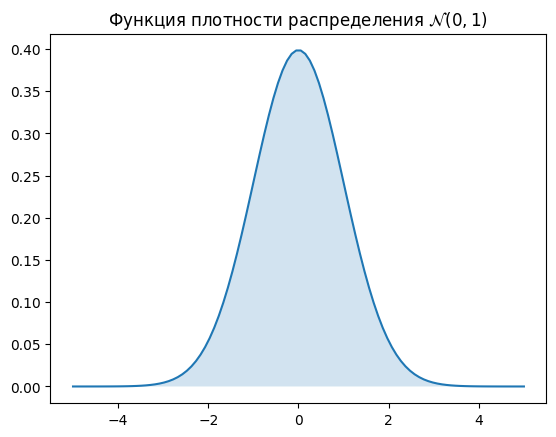

## 0.4
Найдем вероятность, что случайная величина принимает значение меньшее, чем указанное, и отразим это на графике. Будем пользоваться ранее созданным генератором нормального стандартного распределения.

* Выберите произвольное значение для случайной величины (например -1). Будем называть это значение **right**;
* найдите вероятность того, что стандартно нормально распределеная случайная величина принимает значение, меньшее или равное **right**  (`cdf`);
* \* Нарисуйте график распределение так же, как в предыдущем пункте.
* \* Залейте область под кривой плотности распределения от самой левой границы графика до **right** произвольным цветом (`plt.fill_between`);
* \* Добавьте на график информацию о вероятности попадания случайной величины на диапазон до **right** (`plt.text`).

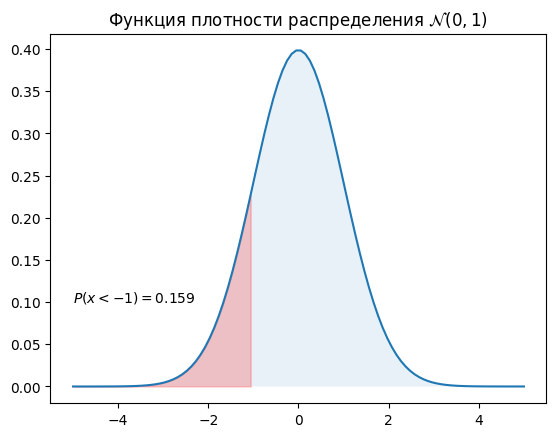

## 0.5
Добавим еще один параметр -- **left** -- и будем искать вероятность того, что случайная величина примет значение на интервале от **left** до **right**. Попробуйте найти эту вероятность для произвольного интервала и попробовать "залить" этот интервал на графике распределения (например от -1 до 1).

Если вы всё сделали правильно, то вероятности попасть на диапазоны (-1, 1), (-2, 2), (-3, 3) совпадут с теми, что представлены ниже на картинке (<a href="https://wiki.loginom.ru/articles/3-sigma-rule.html">правило трёх сигм</a>).<br>
<img src="./data/pics/sigma-rule.jpg" width="42%" />

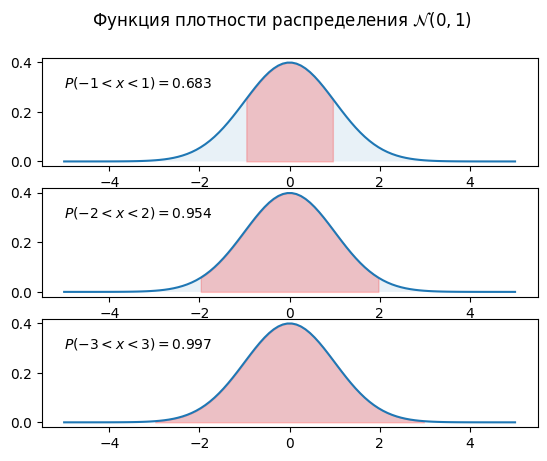

## 0.6
Попробуем теперь не нахожить плотность по значению случайной величины, а значение случайной величины (`ppf`).

* Найдите значение случайной величины $x$, такое что $ \mathbb{P} (x < 0.5)$;
* Найдите значение случайной величины $x$, такое что $ \mathbb{P} (x < 0.95)$;
* Найдите значения лучайной величины $x$, такие что $ \mathbb{P} (0.1 < x < 0.3)$;
* * Найдите значения лучайной величины $x$, такие что $ \mathbb{P} (0.025 < x < 0.975)$.

\*Работаем всё с тем же стандартным нормальным распределением.

0.0
1.64
-1.28 -0.52
-1.96 1.96


# Task 1. Service level. 
Предположим, что у нас есть ларёк по продаже сладкой ваты. Из исторических данных, которые мы уже давно собираем, предполагаем, что суточные продажи сладкой ваты в штука распределени нормально, среднее равно 50, а стандартное отклонение 10. 

## 1.1 
Оцените вероятность того, что за сутки было продано меньше 40 ед. сладкой ваты. 

Probability of selling less than 40 units: 0.1587


## 1.2
Найдите, на какое количество ед. сладкой ваты необходимо продуктов, чтобы с вероятностью 95% их хватило на рабочий день.<br>Иными словами так: сколько должны продуктов, чтобы лишь в 5% рабочих дней их не хватило на весь спрос. 

\*Такая величина называетс service level или уровень сервиса 1 рода. С помощью неё расчитывается далее reorder point, то есть количество товара, когда надо заказывать новую поставку.

Inventory reorder point for 95% service level: 66.45


Получается, что нам необходимо иметь материалов на 66.45 ед. сладкой ваты, чтобы в 95% случаев полность удовлетворить спрос. Окргулим до 67. Вероятность продасть 67 или больше равна 0.045 (проверьте с помощью `cdf`).

## 1.3
Проверим, что мы всё сделали правильно и действительно необходимо продуктов на 67 ед. сладкой ваты. Для этого проведем симуляцию.<br>
Мы знаем, как распределены суточные продажи. 
* Повторим процедуру 1000 раз:
    * Возьмём выборку размера 100 из нормального распределения со средним 50 и стд 10 (`rvs`);
    * Посчитаем долю дней, когда было бы продано 67 сладких ват или больше.

Мы получили 1000 значений для доли дней, когда продажи были больше или равны 67. То есть мы получили распределение для выборочной доли. Прежде чем рисовать картинку (`plt.hist`) для этого распределения доли, подумайте, а как распределена эта доля? Ответ далее.


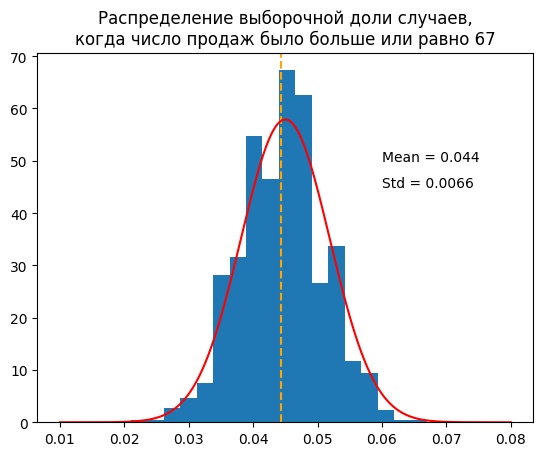

Выборочная доля асимптотически распределена нормально со средним $p$ и дисперсией $\frac{pq}{n}$. В нашем случае $p$ -- вероятность того, что было продано 67 или более сладких ват.

Вспомним, что бы хотели, чтобы лишь в 5% случаев нам не хватало сладких ват для удовлетворения спроса. Определили, что тогда нужно иметь запас на 67 сладких ват (строго говоря, получилост 66 с чем-то, но половины земплекопа быть не может, так что мы округлили в бОльшую сторону, вероятность продать 67 и более примерно равна 0.045).  
Значит, если порог в 67 был определен правильно, то для выборки в 1000 выборочных долей $среднее=p\approx 0.045$, $дисперсия=\frac{0.045 * 0.955}{1000}\approx 0.000043$.<br>Проверим.

(0.0444, 0.0066)

Кажется, что получили то, что ожидали :)<br>Действительно, если иметь продуктов на 67 сладких ват и наши данные устроены так, как мы предполагаем, то на дистанции получим лишь 5% пробоев, когда не смогли до конца удовлетворить спрос (не хватило продуктов).

# Task 2. Овербукинг.
В индустрии перевозок есть такое явление, как овербукинг, заключающееся в продаже большего числа билетов, чем имеется мест в транспортном средце. В РФ такая практика запрещена, но, например, активно используется в США (тем не менее, <a href="https://tass.ru/ekonomika/19728283">иногда авиаперевозчики овербукинг допускают</a> и у нас).

На самом деле, овербукинг -- адекватная с точки зрения извлечения максимальной прибыли стратегия. Мы можем оценить вероятность "переполнения" самолёта и найти такое количество билетов, которое можно продать, чтобы с какой-то установленной вероятностью извлечь максимальную прибыль, но не перегрузить самолет. Например, можем установить, что мы можем продавать на 5% билетов больше и всё равно в 99.9% случаев пассажиров не будет больше чем мест, так как кто-то не придет.

Нам нужно понять, как моделировать число пассажиров, пришедших на рейс. Кажется, что число пассажиров -- счётчик. Тогда можно попробовать распределение Пуассона.  
Как бы мы поняли, какое распределение тут подходит?  Дредположим, что в нашей авикомпании летают только самолёты A320 с 180 местами. И что все направления эквивалентны по "загрузке".<br>
Возьмем все рейсы нашей компании. Узнаем, сколько было пассажиров на каждом.<br>
1. Построим картинку для плотности распределения. Подумаем, на форму какого распределения похоже наше.
2. Если у нас есть предположение о распределении данных, то может провести стат. тест и оценить то, что наше эмпирическое распределение порождено каким-то фундаментальным.
3. В идеале нам, конечно, знать, как распределена наша величина, как моделируется число пассажиров в самолете или ещё где-то в похожем случае. Скорее всего, кто-то уже давно это нашёл и доказал.

Вот и в нашем случае быстрый гуглёж (или развитие вашей мысли) могло привести к тому, что число пассажиров в самолете лучше всего моделируется биномиальным распределением.<br>
Каждый человек приходит на рейс или не приходит с какой-то вероятностью (распределение Бернулли). Число пассажиров на борту -- сумма таких величин.<br>
Сумма бернуллиевских величин -- биномиально распределенная величина.<br><br>
Будем моделировать число пассажиров на рейсе с помощью биномиального распределения.

## 2.1
На исторических данных, которых у нас много, мы оценили, что лишь 95% пассажиров, купивших билет, реально приходят на посадку.<br>
Тогда будем считать, что вероятьность того, что человек пришёл на посадку, равна 0.95. ($p=0.95$). <br>
Вероятность, что не пришёл, равна 0.05 ($q=0.05$).
Будем считать, что в самолёте **180 мест**, а мы **продаём 200 билетов**.

Биномиально распределна в данном случае следующая величина -- число людей, фактически пришедших на посадку.<br>
При этом продано билетов 200, а вероятность, что каждый отдельный человек пришел, равна 0.95.<br>
Создайте генератор биномиального распределения с соответсвующими параметрами (`stats.binom`). 


## 2.2
Посчитайте вероятность того, что, несмотря на овербукинг, все пришедшие пассажиры полетят (то есть пришло 180 или меньше человек).

0.0027

Должна получить очень маленькая вероятность. Почему она такая маленькая? Давайте оценить это с другой стороны.

Биномиальная величина -- сумма бернуллиевский случайных величин. То есть это сумма независимых (в совокупности) случайных величин. Мы знаем, что по ЦПТ такая сумма будет сходиться к нормальному распределению. И действительно, считается, что если $npq > 5$, а $0.1 < p < 0.9$, то такое биномиальное распределение сходится к нормальному (а при преобразованиях и к стандартному нормальному). А если $npq > 25$, то тогда и при более экстремальных значениях $p$ сходимость тоже есть.

В нашем случае $npq = 200 * 0.95 * 0.05 = 9.5 > 5$ и $p$ попадает на указанный интервал. Значит сходимость к нормальному распределению есть.<br>
Для нормального распределение есть правило трёх сигм (что 99.7% данных лежат на интервале $\pm3\sigma$ от матожидания (среднего).<br>
Среднее биномиального распределения $\mu = np = 200 * 0.95 = 190$, дисперсия $var=npq = 200*0.95*0.05=9.5$, тогда стандартное отклонения $\sigma=\sqrt{var} = \sqrt{9.5} \approx 3.08 $.<br>
Значит ~0.997 плотности вероятности находится на интервале $190\pm 3.08$, или $(180.76, 199.24)$. 

180 находится за интервалом, значит вероятность продать 180 билетов или меньше крайне мала.

## 2.3 
Постройте график плотности распределение для нашего биномиального распределения.

Тут важно заметить, что плотность распределения существует только для непрерывных величин. Биномиальная величина такой не является, он дискретна (число людей).<br>
Для непрерывных мы пользуемся probability density function (`pdf`), то для дискретных probability mass function (`pmf`), которая возвращает вероятность того, что дискретная случайная величина принимает какое-то значение.<br>
Мы можем для каждого икса на интервале посчитать `pmf` и построить точечный график.

* Создайте вектор со значения от 175 до 205;
* С помощью `stats.binom.pmf` получите значения функциия вероятности (не функции плотности вероятности, а просто функции вероятности. но звучит коряво на русском, сори);
* Постройте на одной картинке сначала обычный график (`plt.plot`), а потом диаграмму рассеяения (`plt.scatter`).
* \* Закрасьте область под графиком от 170 до 180 (`plt.fill_between`) (еле увидите глазом).
* \* Посчитайте среднее ($\mu = np$) и нарисуйте пунктирную вертикальную линию (`plt.axvline`, используйте аргумент `linestyle='--'`)

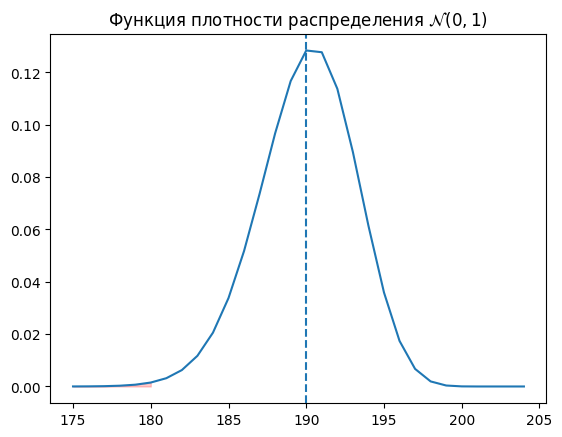

## 2.4
Оцените вероятность того, что придёт от 190 до 200 пассажиров.

0.5426

## 2.5
Определите, сколько нужно продавать билетов, чтобы вероятность "всем влезть в самолет" была не менее 95%. Нарисуйте график квантиля уровня 0.95 для $n$ на интервале от 180 до 200.

_\*Просто `ppf` тут не поможет, так как мы варьируем число билетов $n$, а это параметр распределения. Получается, что надо найти такое максимальное $n$, чтобы квантиль 0.95 биномиального распределения был не больше 180. Разжовываем. Нам нужно, чтобы вероятность того, что всем хватит места, была 95% или больше. Это означает, что нам нужно, чтобы вероятность того, что по факту придёт 180 пассажиров или меньше была равна 0.95. Это есть ни что иное, как `cdf(180)`._

* Создайте вектор с числами от 180 до 200;
* Создайте генератор биномиальных распределений (если дать `stats.binom` не одно значение параметра, а вектор, то будет создано несколько генератов. Т.е. передайте вектор со значениями $n$ при создании генератора);
* Получите вероятности того, что пришло не более 180 людей (для этого просто примените `cdf` к созданному генаратору. будет возвращено значение верятности для каждого параметра из переданного в предыдущем пункте вектора) (_можно получать не вероятностьи с помощью `cdf`, а значения квантиля 0.95 с помощью `ppf` и найти такое первое $n$, квантиль которого $\ge 180$_);
* Найдите максимальное $n$, для которого вероятность, что пришло не больше 180 людей, не ниже 0.95;
* \* Нарисуйте график зависимости квантиля 0.95 биномиального распределния от числа $n$;
* \* Добавьте горизонтальную пунктирную прямую (`plt.axhline`, `linestyle='--'`)
* \** Добавим на один и тот холс график не вероятностей, а самих квантилей. Если вероятности измеряются от 0 до 1, то значения квантилей -- это количество людей. То есть это что-то типа 180 и тд. Ось икс общая, а ось игрек будет другая. Добавить второй график на тот же холст, но с другой осью игрек, можно как <a href="https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib">в этом примере</a>.


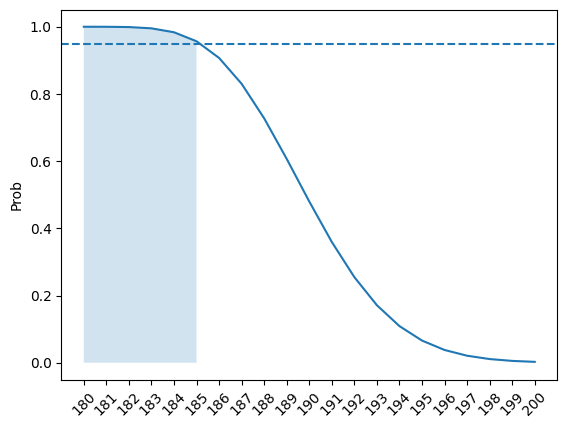

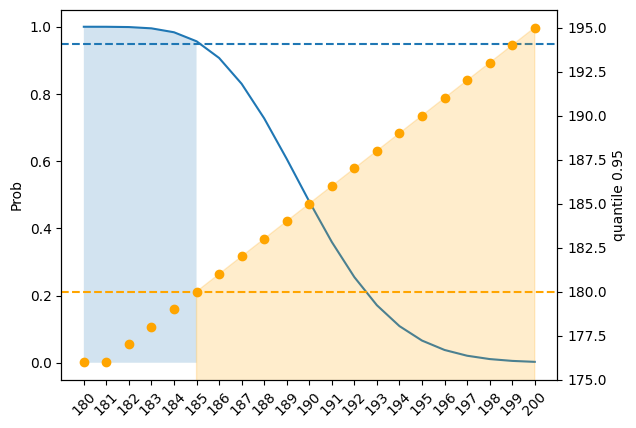

Получилось, что при $n=185$ (и $p=0.95$) вероятность того, что все пришедшие влезут в самолет будет более 95%. Если продадим 186 билетов, то вероятность уже меньше 95%.

cdf n=185 p=0.95 0.9567
cdf n=186 p=0.95 0.9071


## Task 3. Контроль брака.

Ваше предприятие производит некоторую деталь.<br>
Вес детали должен составлять 380 граммов. Для станка известна погрешность, она была определена производителем и составляет 14 граммов.<br>
Производитель также эмпирически, что вес детали можно моделировать нормальным распределение.

## 3.0 
Создайте генератор нормалнього распределения с необходимыми параметрами.

## 3.1
Найдите вероятность того, что вес произведенной детали меньше 400 граммов.

0.9234

## 3.2
Найдите вероятность того, что вес произведенной детали больше 390, но меньше 400.

0.161

## 3.3
На производственной ленте стоят весы, которые могут обраковывать детали, вес которых попадает на указанный диапазон, больше или меньше какого-то значения.

Известно, что детали, масса которых меньше 380 граммов, не представляют никаких проблем и функционируют отлично. А вот детали тяжелее 380 могут оказаться проблемными. И чем тяжелее деталь положенного норматива, тем хуже.

Предприятие может себе позволить отбраковывать 10% от произведенной продукции.

Предложите границы для весов, которые отбраковывают материал, чтобы 90% от произведенной продукции пошли на продажу.

397.9